In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
network = pd.read_csv('data/network_data.csv')
network.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,9311,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.00,0.0,200,87,0.44,0.01,0.44,0.00,0.00,0.01,0.0,0.0,normal
1,0,tcp,http,SF,250,5966,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.00,0.0,120,255,1.00,0.00,0.01,0.03,0.00,0.00,0.0,0.0,normal
2,0,tcp,finger,SF,9,593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.00,0.0,195,8,0.04,0.02,0.01,0.25,0.01,0.00,0.0,0.0,normal
3,0,udp,private,SF,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,4,0.0,0.0,0.0,0.0,0.2,0.15,0.0,255,4,0.02,0.30,0.90,0.00,0.00,0.00,0.1,0.0,anomaly
4,0,tcp,http,SF,300,1075,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.00,0.0,255,241,0.95,0.01,0.00,0.00,0.00,0.00,0.0,0.0,normal


In [3]:
network_copy = network.copy()
network_copy.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,9311,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.00,0.0,200,87,0.44,0.01,0.44,0.00,0.00,0.01,0.0,0.0,normal
1,0,tcp,http,SF,250,5966,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.00,0.0,120,255,1.00,0.00,0.01,0.03,0.00,0.00,0.0,0.0,normal
2,0,tcp,finger,SF,9,593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.00,0.0,195,8,0.04,0.02,0.01,0.25,0.01,0.00,0.0,0.0,normal
3,0,udp,private,SF,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,4,0.0,0.0,0.0,0.0,0.2,0.15,0.0,255,4,0.02,0.30,0.90,0.00,0.00,0.00,0.1,0.0,anomaly
4,0,tcp,http,SF,300,1075,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.00,0.0,255,241,0.95,0.01,0.00,0.00,0.00,0.00,0.0,0.0,normal


## Handle missing (isn't any)

In [4]:
network_copy.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## Handle duplicates

In [5]:
no_duplicates = network_copy.drop_duplicates()
no_duplicates.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,9311,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.00,0.0,200,87,0.44,0.01,0.44,0.00,0.00,0.01,0.0,0.0,normal
1,0,tcp,http,SF,250,5966,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.00,0.0,120,255,1.00,0.00,0.01,0.03,0.00,0.00,0.0,0.0,normal
2,0,tcp,finger,SF,9,593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.00,0.0,195,8,0.04,0.02,0.01,0.25,0.01,0.00,0.0,0.0,normal
3,0,udp,private,SF,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,4,0.0,0.0,0.0,0.0,0.2,0.15,0.0,255,4,0.02,0.30,0.90,0.00,0.00,0.00,0.1,0.0,anomaly
4,0,tcp,http,SF,300,1075,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.00,0.0,255,241,0.95,0.01,0.00,0.00,0.00,0.00,0.0,0.0,normal


In [6]:
len(no_duplicates) # check how many rows we lost 

4271

## Identify feature type columns

In [7]:
cat_cols = []
num_cols = []
# separate the 1 or 0 columns. do they need to be scaled? scaled differently?
bin_cols = []
# all 0's not helpful
empty = []

for col in no_duplicates.columns:
    if no_duplicates[col].dtype in ['object', 'O']: # some of them are just 'o'
        cat_cols.append(col)
    elif set(no_duplicates[col].unique()) == {0,1}: bin_cols.append(col)
    elif (no_duplicates[col] == 0).all(): empty.append(col)
    else: num_cols.append(col)

# num is picking up all columns? 
num_cols = [col for col in num_cols if col not in cat_cols and col not in bin_cols and col not in empty]

print(f'Categorical features: {cat_cols}\n')
print(f'Numerical features: {num_cols}\n')
print(f'Binary features: {bin_cols}\n')
print(f'Not useful: {empty}\n')

Categorical features: ['protocol_type', 'service', 'flag', 'class']

Numerical features: ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot', 'num_compromised', 'su_attempted', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

Binary features: ['land', 'logged_in', 'root_shell', 'num_shells', 'num_access_files', 'is_guest_login']

Not useful: ['urgent', 'num_failed_logins', 'num_outbound_cmds', 'is_host_login']



## Data Exploration

### Overlaid histograms for continuous features

In [8]:
explore_data = network.copy()
explore_data['class'] = explore_data['class'].replace({'anomaly': 1, 'normal': 0})

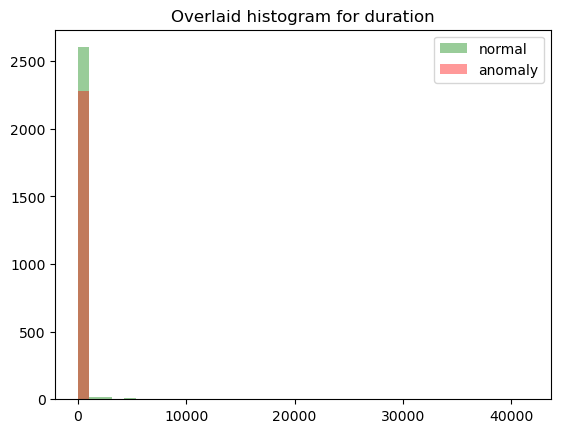

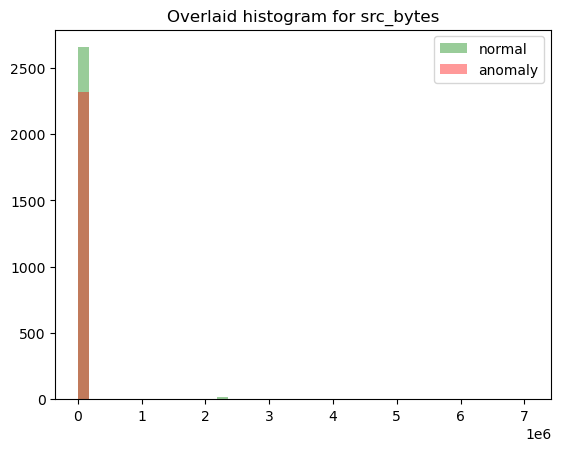

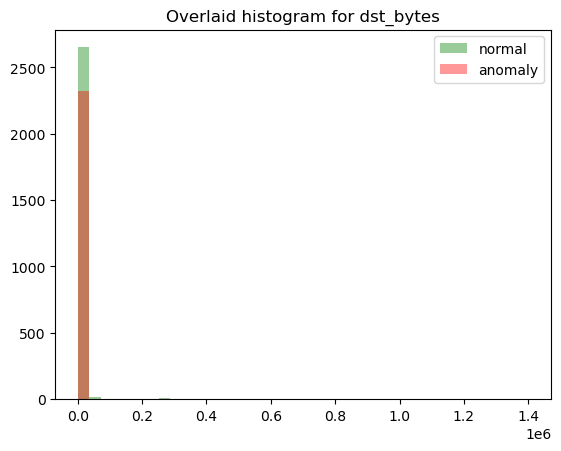

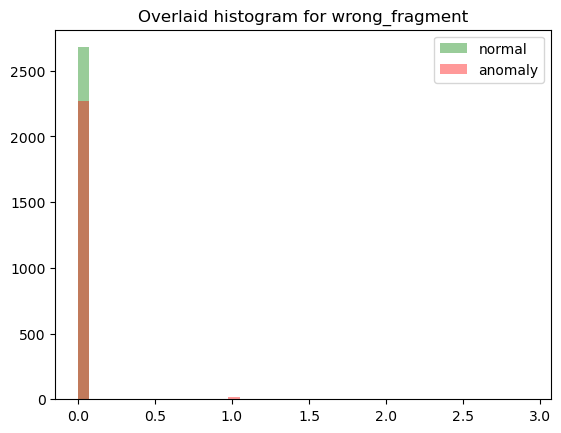

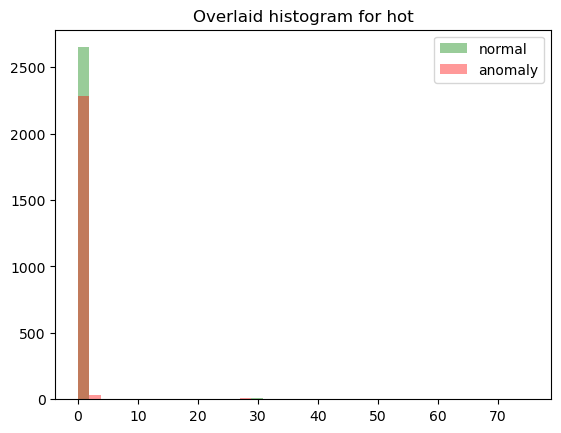

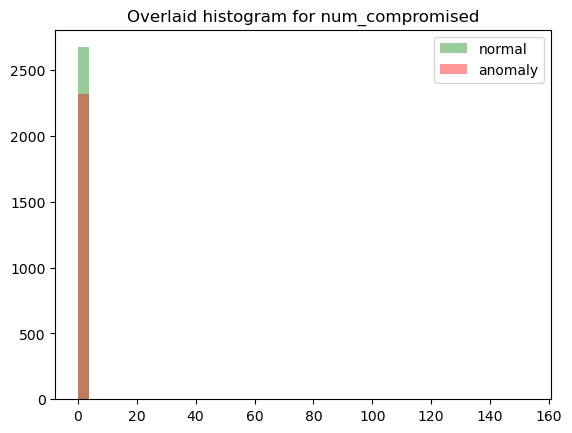

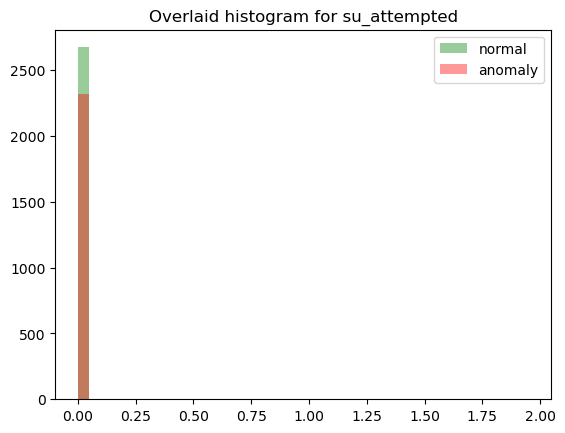

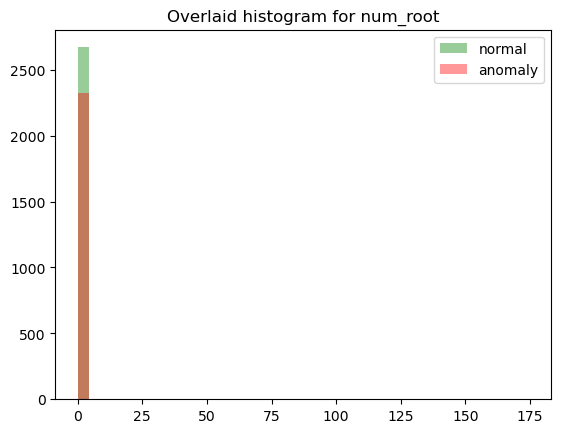

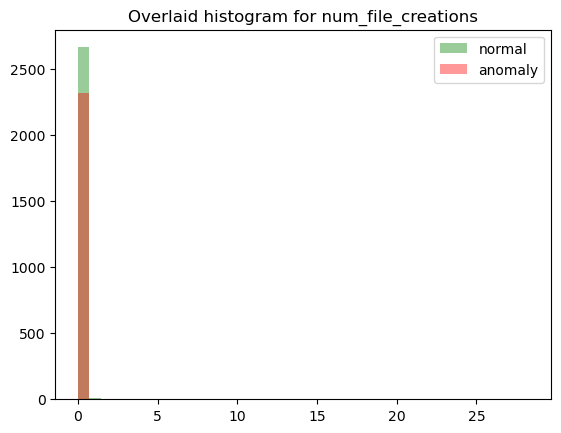

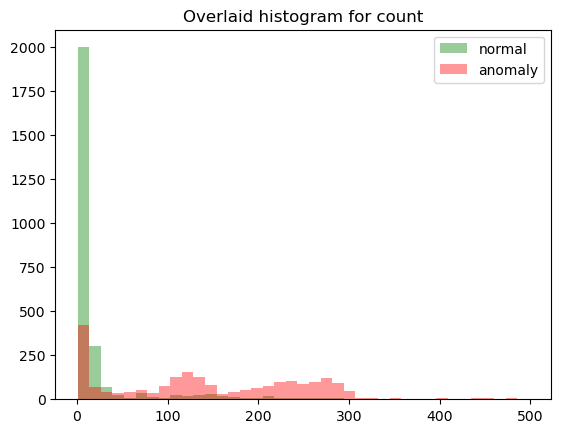

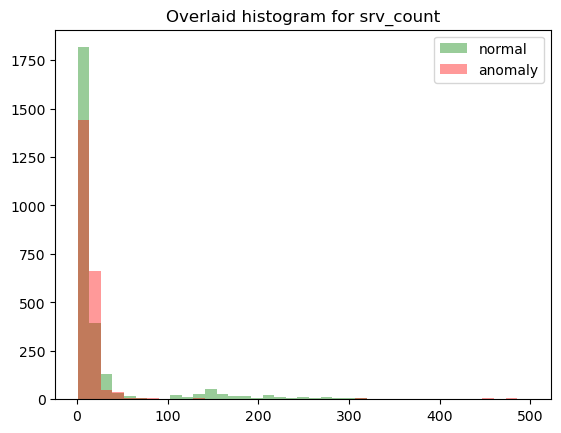

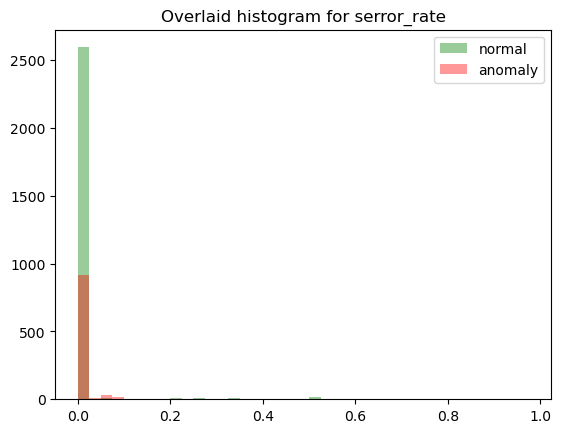

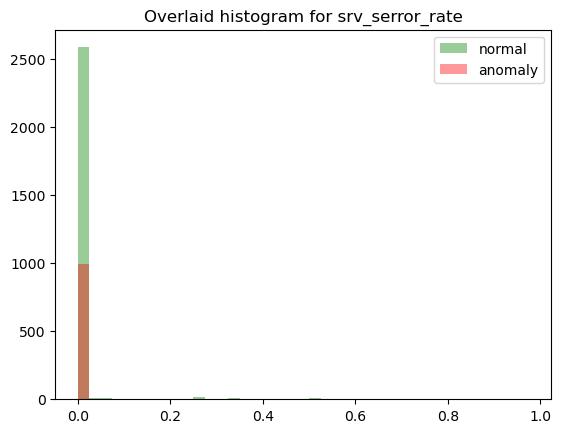

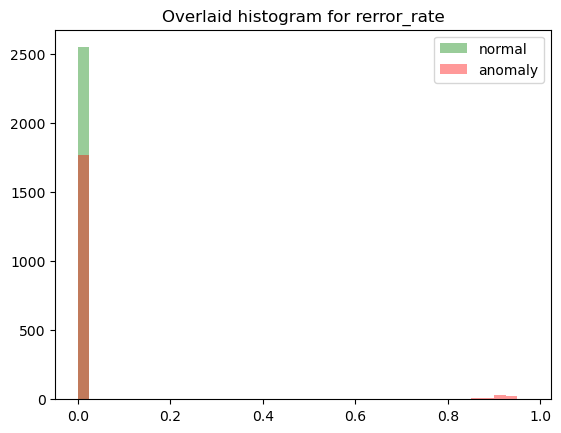

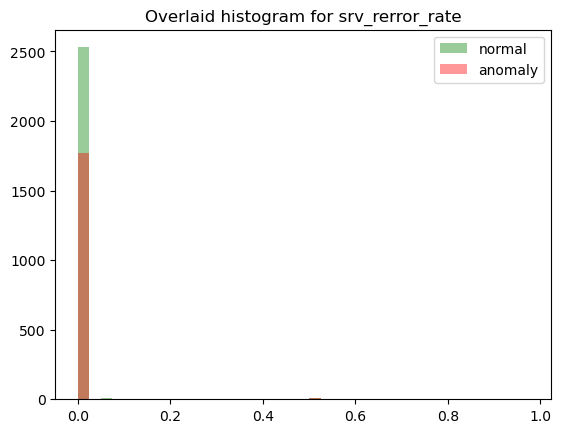

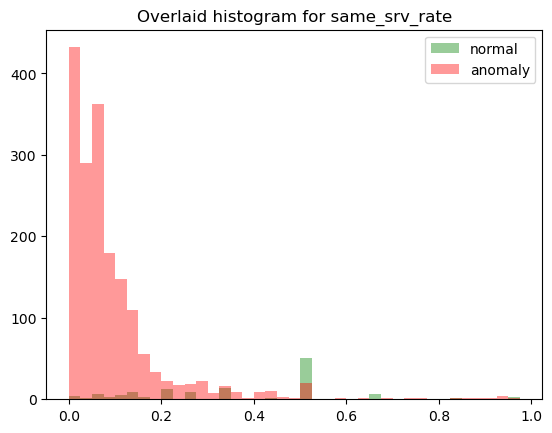

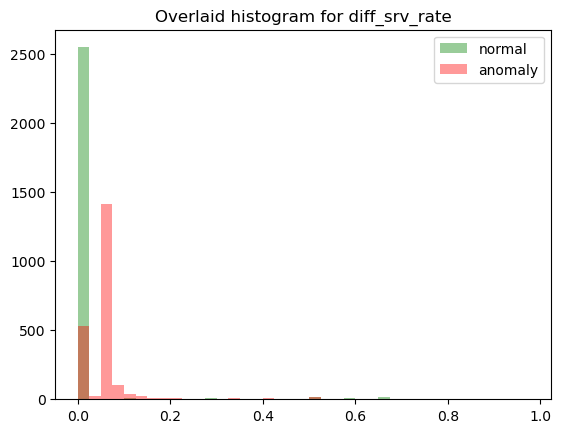

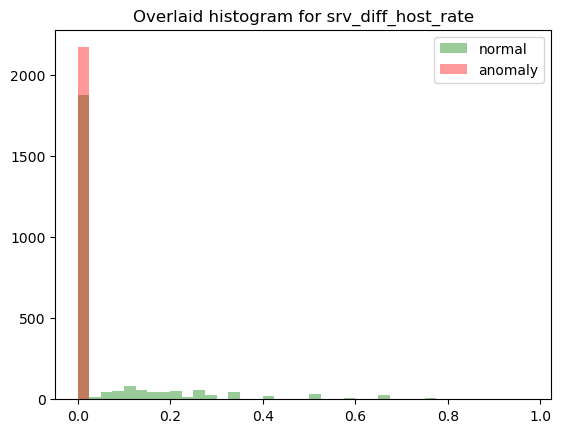

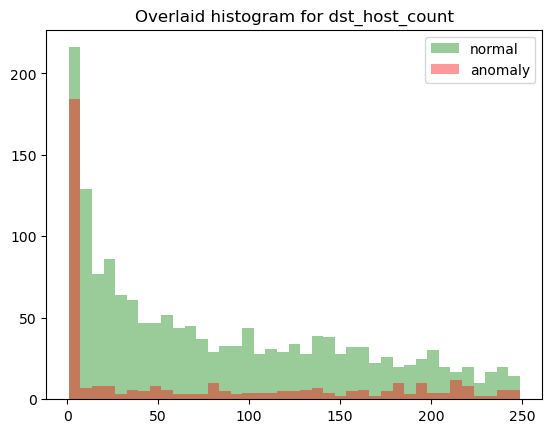

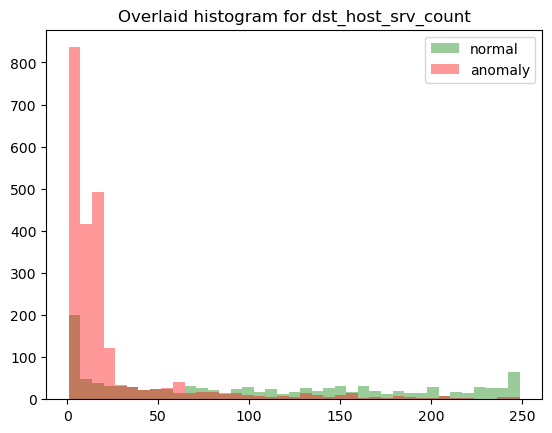

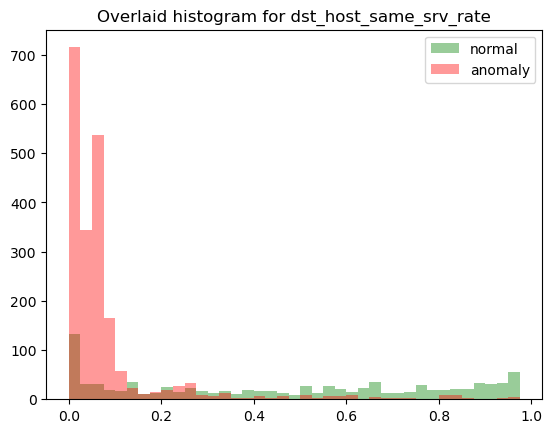

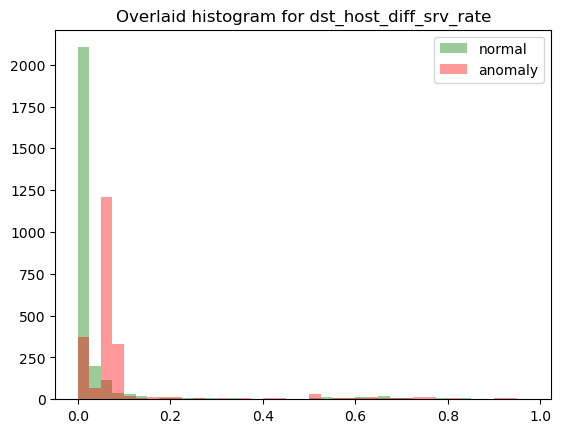

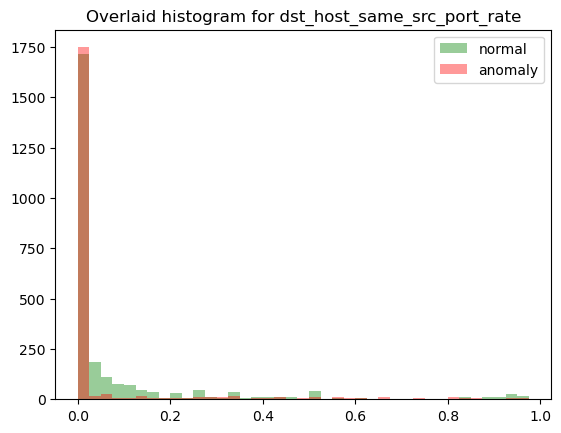

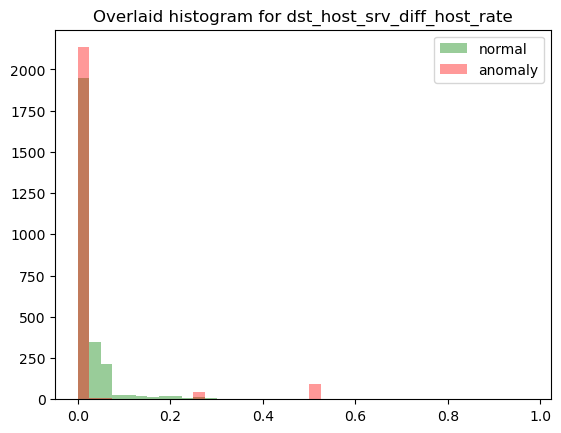

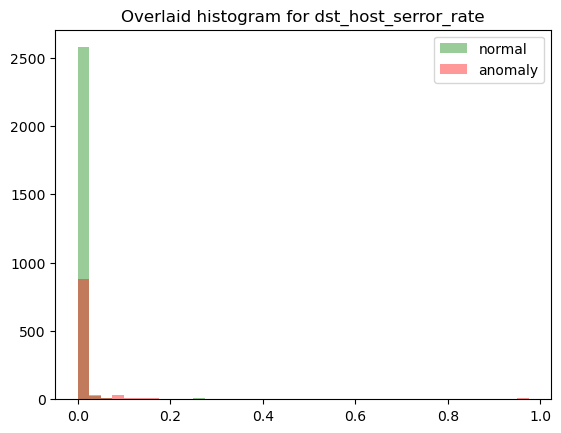

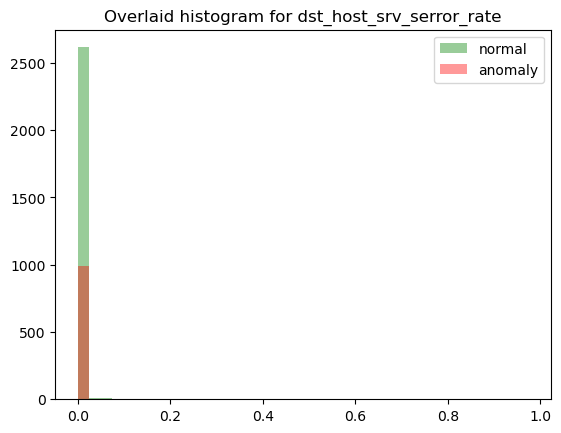

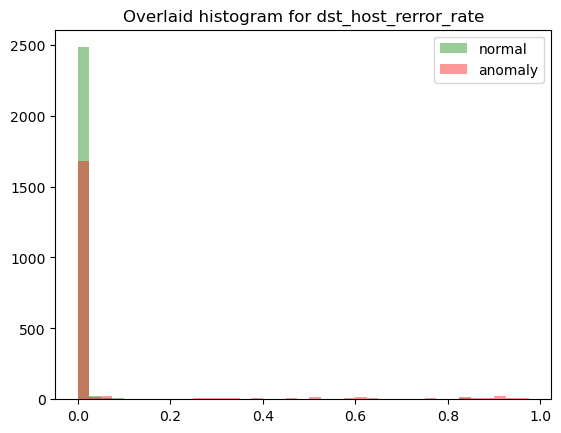

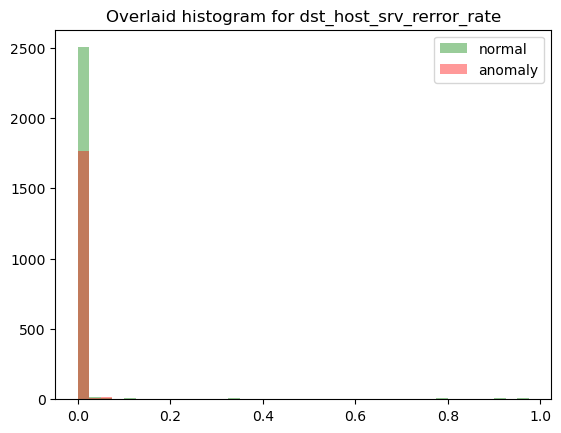

In [9]:
# Plot overlaid histograms for continuous features
for i in num_cols:
    # get all non missing features and assign them to survived or died 
    normal = list(explore_data[explore_data['class'] == 0][i].dropna())
    anomaly = list(explore_data[explore_data['class'] == 1][i].dropna())
    
    xmin = min(min(normal), min(anomaly))
    xmax = max(max(normal), max(anomaly))
    width = (xmax - xmin) / 40
    sns.distplot(normal, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(anomaly, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['normal', 'anomaly'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

- shape of data for count is different for anomalies and normals
- same srv rate 
- dst host count very different 
- dst host srv count
- dst host same srv count
- dst host diff srv count

### Explore categorical features

In [10]:
categorical = explore_data[['protocol_type', 'service', 'flag', 'class']]
categorical.head()

,protocol_type,service,flag,class
0,tcp,ftp_data,SF,0
1,tcp,http,SF,0
2,tcp,finger,SF,0
3,udp,private,SF,1
4,tcp,http,SF,0


In [11]:
# number of unique values for each feature
for col in categorical.columns:
    print('{}: {} unique values'.format(col, categorical[col].nunique()))

protocol_type: 3 unique values
service: 64 unique values
flag: 11 unique values
class: 2 unique values


- service is quite noisy
- explore flag and protocol more 

protocol_type


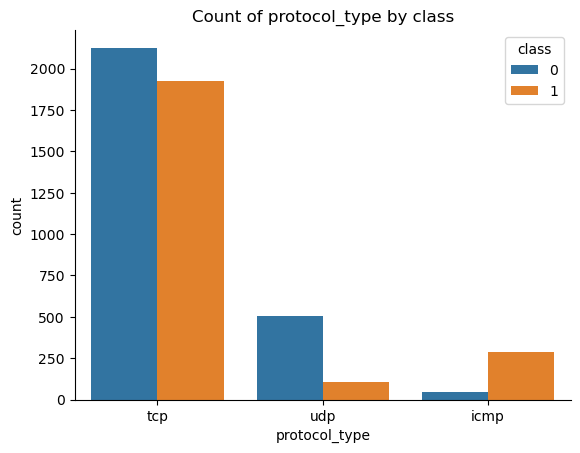

service


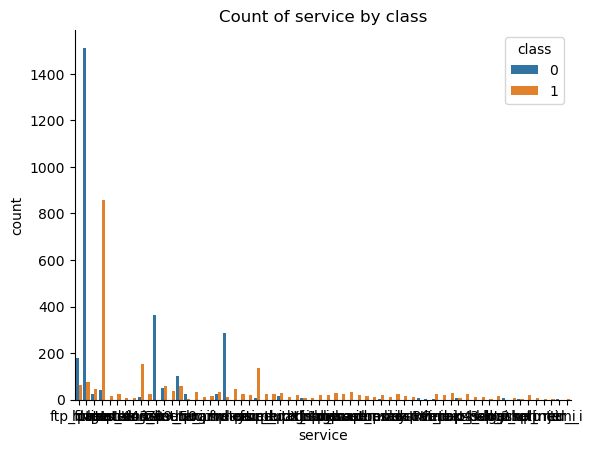

flag


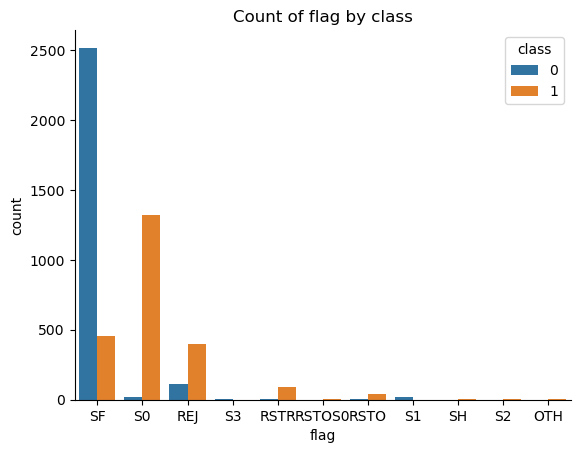

In [12]:
for col in categorical.columns:
    if col != 'class':
        print(col)
        sns.countplot(data=categorical, x=col, hue='class')
        sns.despine()
        plt.title(f'Count of {col} by class')
        plt.show()

- tcp has relatively even mix of anomaly and normal
- udp has more normal connections
- icmp has more anomalies

In [13]:
piv_tab = categorical.pivot_table(index=['service'], values=['class'], aggfunc=['count', 'mean'])
piv_tab

,count,mean
,class,class
service,,
IRC,6,0.000000
X11,11,0.545455
Z39_50,35,1.000000
auth,43,0.651163
bgp,21,1.000000
courier,33,1.000000
csnet_ns,19,1.000000
ctf,21,1.000000


- domain_u has 364 rows, 0% anomaly 
- http has 1589 rows and 4% anomaly
- private has 902 rows and 95% anomaly 
- smtp has 300 rows and 4% anomaly 

In [14]:
categorical.pivot_table('class', index=['flag'], aggfunc=['count', 'mean'])

,count,mean
,class,class
flag,,
OTH,2,1.000000
REJ,511,0.780822
RSTO,46,0.891304
RSTOS0,3,1.000000
RSTR,98,0.959184
S0,1335,0.987266
S1,17,0.000000
S2,3,0.666667


In [15]:
# percentage of anomalies by protocol_type
categorical.groupby('protocol_type').mean()

,class
protocol_type,
icmp,0.870482
tcp,0.475462
udp,0.171289


- 87% of connections using icmp are anomalies 
- just less than half tcp are anomalies, harder to find a signal here
- only 17% of udp connections are anomalies

In [16]:
categorical['protocol_type'].value_counts()

tcp     4055
udp      613
icmp     332
Name: protocol_type, dtype: int64

In [17]:
categorical.pivot_table('class', index=['protocol_type', 'flag'], aggfunc=['count', 'mean'])

count      mean
                     class     class
protocol_type flag                  
icmp          SF       332  0.870482
tcp           OTH        2  1.000000
              REJ      511  0.780822
              RSTO      46  0.891304
              RSTOS0     3  1.000000
              RSTR      98  0.959184
              S0      1335  0.987266
              S1        17  0.000000
              S2         3  0.666667
              S3         6  0.000000
              SF      2027  0.030587
              SH         7  1.000000
udp           SF       613  0.171289

- icmp using SF flag = 87% anomaly
- tcp using SF flag = 3% anomaly
- udp using SF flag = 17% anomaly 

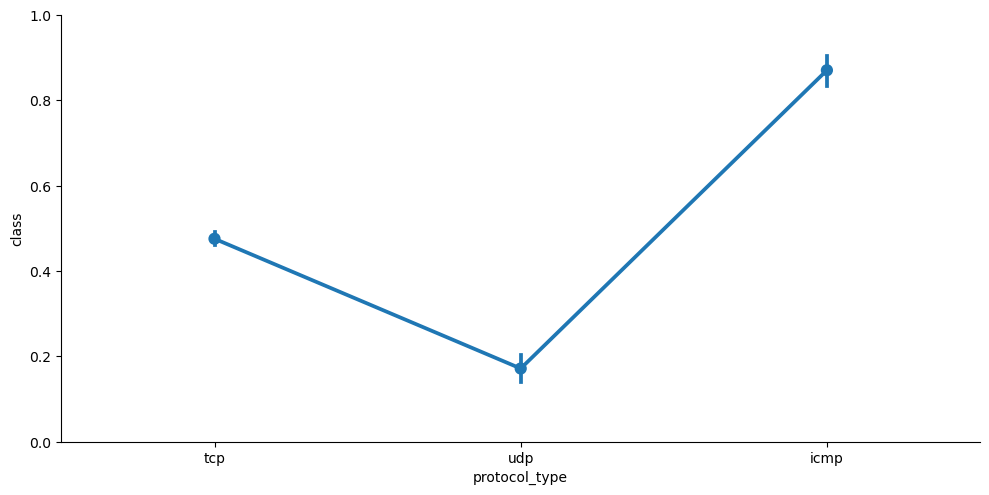

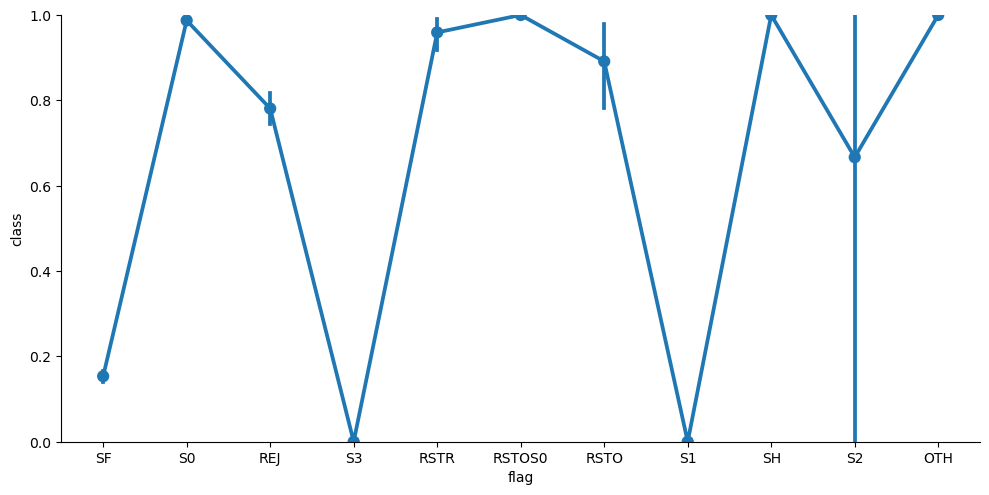

In [18]:
# categorical plots for features
for col in ['protocol_type', 'flag']:
    sns.catplot(x=col, y='class', data=categorical, kind='point', aspect=2, )
    plt.ylim(0, 1)

- margin of error on the SF and S0 flags are pretty small, could be a good feature 
- explore creating more features from this data 

In [19]:
# create new features based on what we learned here 
categorical['isS0'] = np.where(categorical['flag'] == 'S0', 1, 0)

categorical['isSF'] = np.where(categorical['flag'] == 'SF', 1, 0)

categorical['isHTTP'] = np.where(categorical['service'] == 'http', 1, 0)

categorical['isPrivate'] = np.where(categorical['service'] == 'private', 1, 0)

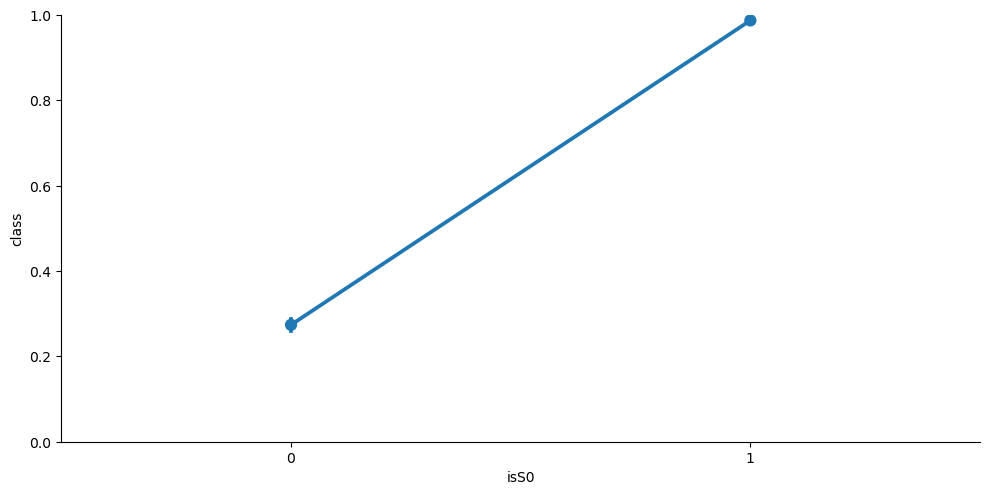

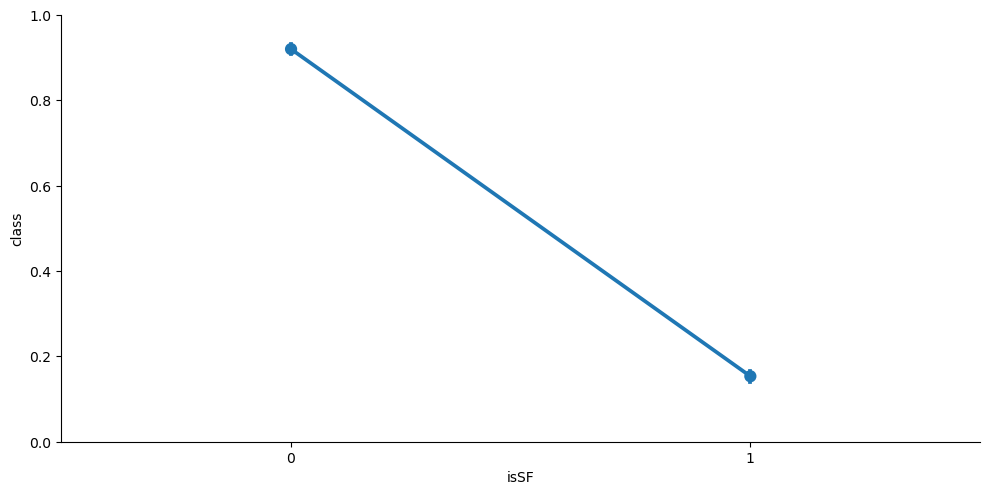

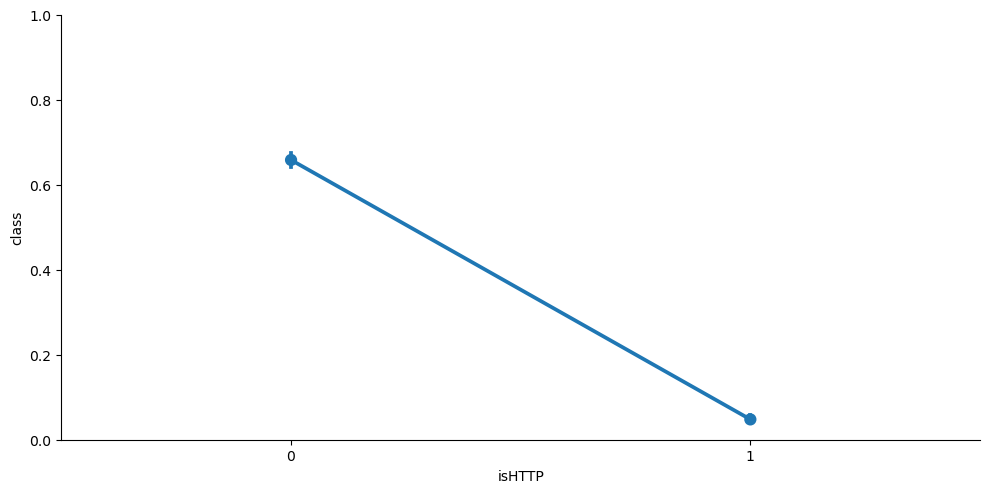

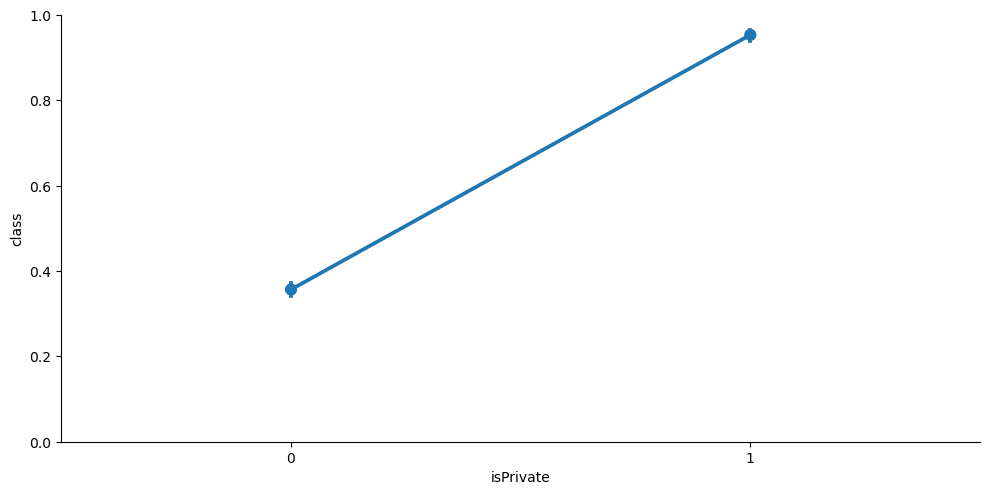

In [20]:
for col in ['isS0', 'isSF', 'isHTTP', 'isPrivate']:
    sns.catplot(x=col, y='class', data=categorical, kind='point', aspect=2, )
    plt.ylim(0, 1)

### Summary of Categorical Analysis 

- flag --> isS0 or isSF
- service --> isHTTP or isPrivate 

## Scaling

### Check the distribution of numerical features

In [21]:
no_duplicates.kurtosis()

duration                        135.361801
src_bytes                       785.885603
dst_bytes                      3341.796912
land                           4271.000000
wrong_fragment                  116.765398
urgent                            0.000000
hot                             339.655346
num_failed_logins                 0.000000
logged_in                        -1.791104
num_compromised                4209.276531
root_shell                     1063.997541
su_attempted                   1737.137913
num_root                       4185.064631
num_file_creations             1799.806194
num_shells                     4271.000000
num_access_files                323.922006
num_outbound_cmds                 0.000000
is_host_login                     0.000000
is_guest_login                  128.628237
count                             1.843239
srv_count                        22.979156
serror_rate                      -1.009107
srv_serror_rate                  -1.003493
rerror_rate

In [22]:
no_duplicates.skew()

duration                       11.158669
src_bytes                      25.047720
dst_bytes                      55.121637
land                           65.352888
wrong_fragment                 10.813208
urgent                          0.000000
hot                            16.174378
num_failed_logins               0.000000
logged_in                       0.457969
num_compromised                64.656387
root_shell                     32.641987
su_attempted                   41.126186
num_root                       64.392075
num_file_creations             41.007372
num_shells                     65.352888
num_access_files               18.049109
num_outbound_cmds               0.000000
is_host_login                   0.000000
is_guest_login                 11.426636
count                           1.465950
srv_count                       4.577346
serror_rate                     0.986872
srv_serror_rate                 0.992995
rerror_rate                     2.235424
srv_rerror_rate 

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'hot'}>],
       [<Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'su_attempted'}>,
        <Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'srv_count'}>,
        <Axes: title={'center': 'serror_rate'}>,
        <Axes: title={'center': 'srv_serror_rate'}>,
        <Axes: title={'center': 'rerror_rate'}>,
        <Axes: title={'center': 'srv_rerror_rate'}>],
       [<Axes: title={'center': 'same_srv_rate'}>,
        <Axes: title={'center': 'diff_srv_rate'}>,
        <Axes: title={'center': 'srv_diff_host_rate'}>,
        <Axes: title={'center': 'dst_host_count'}>,
        <Axes: title={'center': 'dst_host_srv_count'}>]

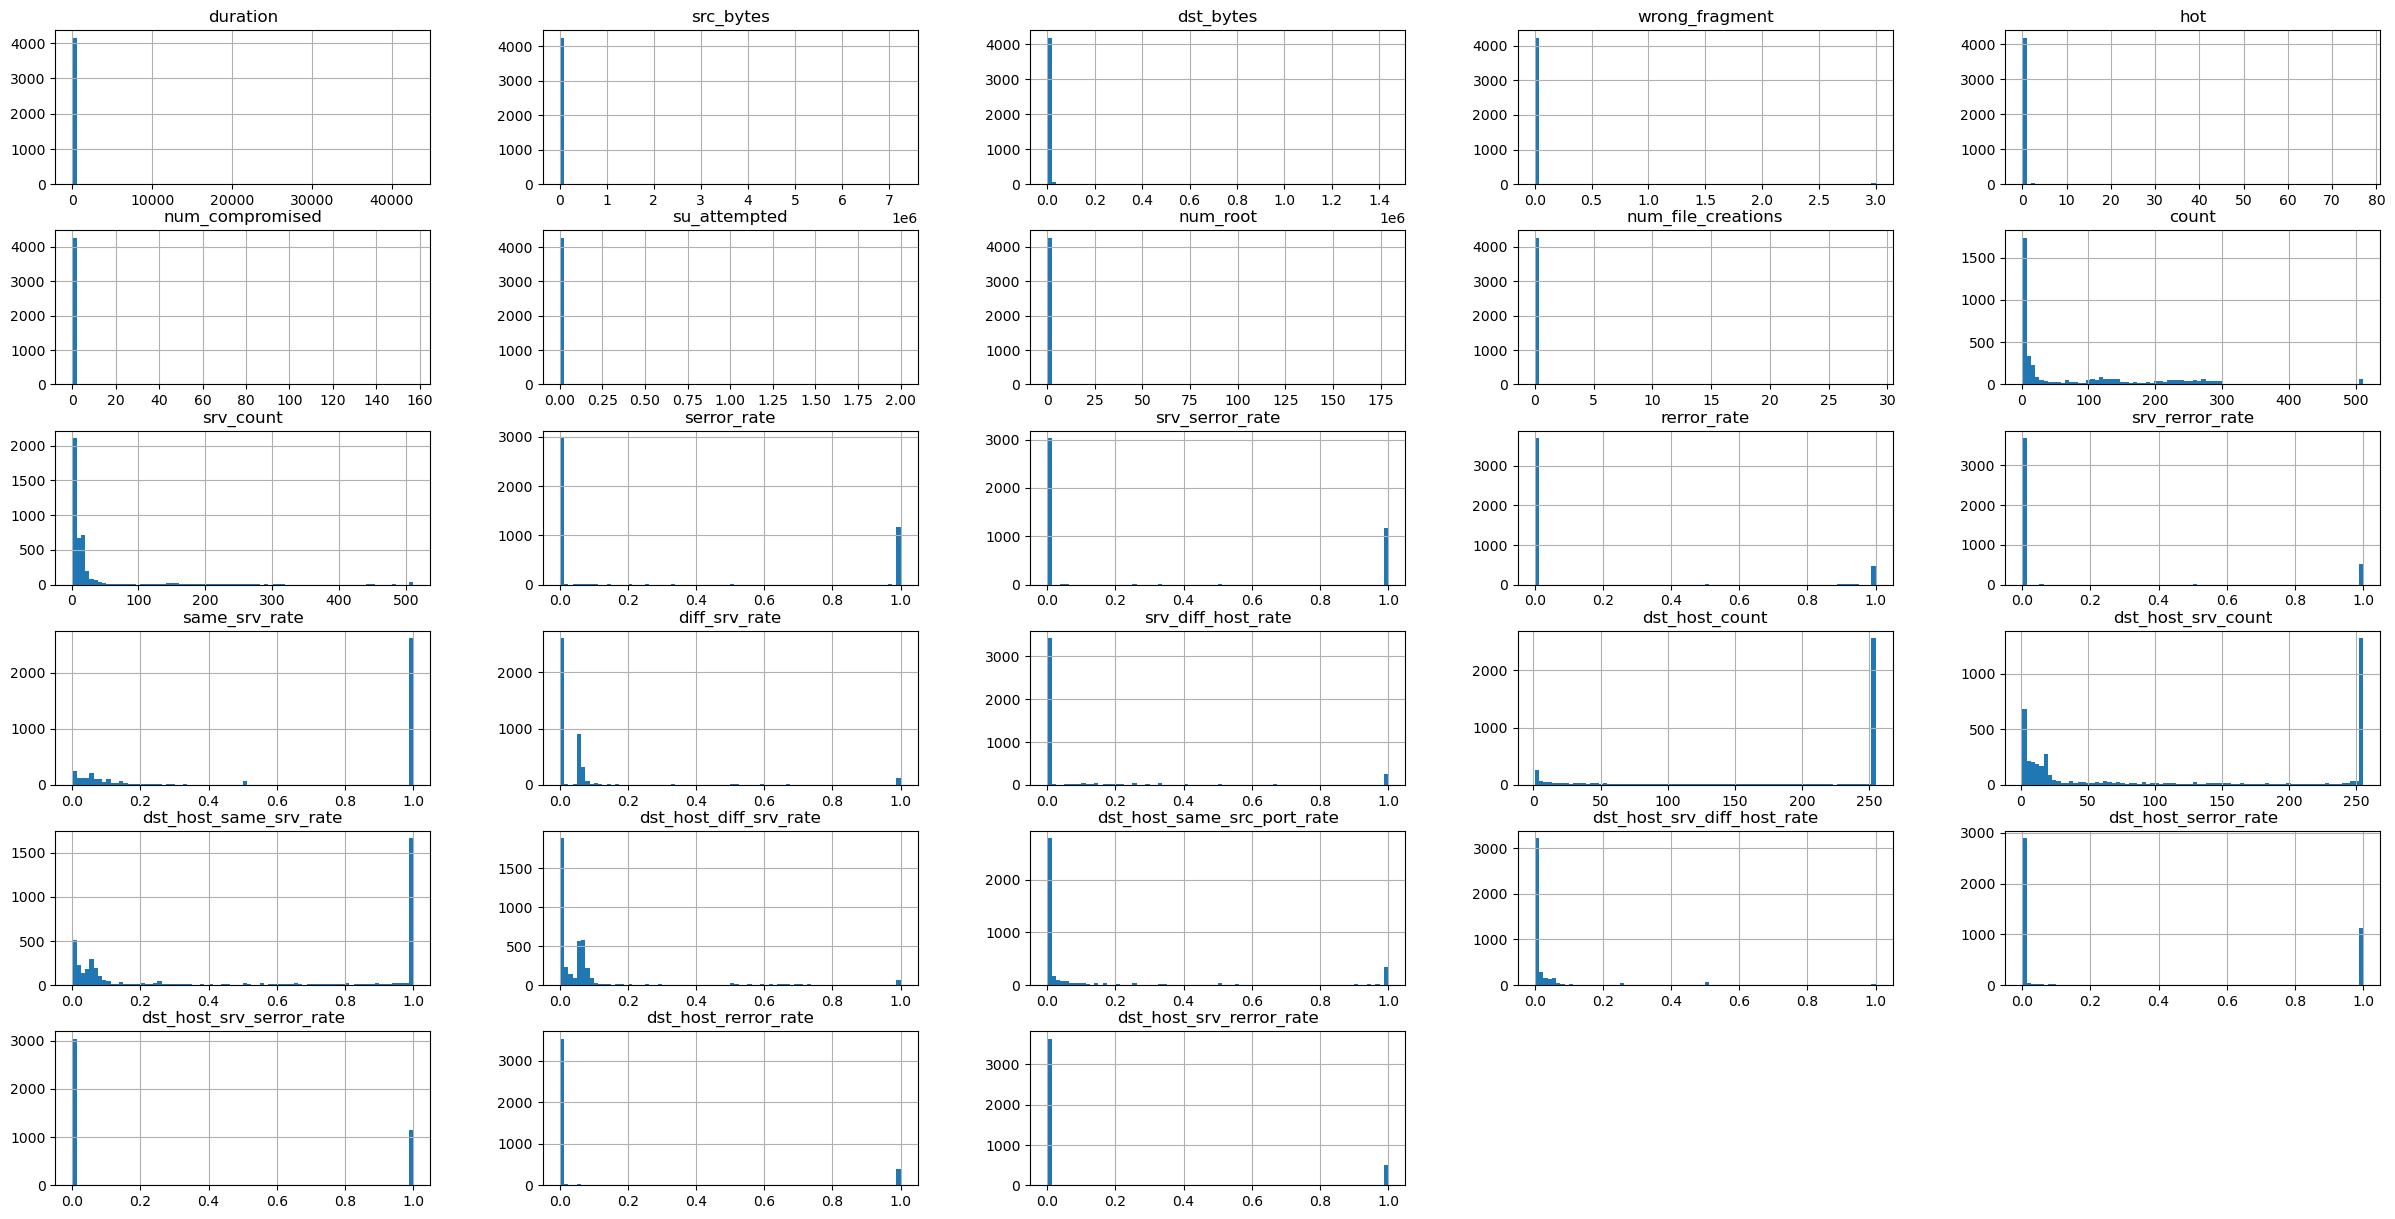

In [23]:
no_duplicates[num_cols].hist(bins=80, figsize=(30,15))

In [24]:
high_skew = []
high_kurtosis = []

for col in num_cols:
    print(f"{col}, skew: {no_duplicates[col].skew()}, kurtosis: {no_duplicates[col].kurtosis()}")
    # skewed = over 1 / less than -1
    if (no_duplicates[col].skew() > 1 or no_duplicates[col].skew() < -1):
        high_skew.append(col)
    # kurtosis = over 3 / less than -3 
    if (no_duplicates[col].kurtosis() > 3 or no_duplicates[col].kurtosis() < -3):
        high_kurtosis.append(col)
    
normal = [x for x in num_cols if x not in high_skew and x not in high_kurtosis]

print()
print('normal', normal)
print()
print('high_skew', high_skew)
print()
print('high_kurtosis', high_kurtosis)
print()

duration, skew: 11.158669390064757, kurtosis: 135.36180086739515
src_bytes, skew: 25.047719896921695, kurtosis: 785.8856033079053
dst_bytes, skew: 55.12163663336008, kurtosis: 3341.7969120645653
wrong_fragment, skew: 10.813207792917533, kurtosis: 116.765398491474
hot, skew: 16.174377612395723, kurtosis: 339.65534574010644
num_compromised, skew: 64.65638746694535, kurtosis: 4209.27653056338
su_attempted, skew: 41.12618636492495, kurtosis: 1737.1379125011335
num_root, skew: 64.39207535478153, kurtosis: 4185.064630852986
num_file_creations, skew: 41.00737150649066, kurtosis: 1799.8061941089438
count, skew: 1.4659502098567918, kurtosis: 1.8432392080300852
srv_count, skew: 4.577346117029287, kurtosis: 22.979155624592504
serror_rate, skew: 0.9868722178166472, kurtosis: -1.009106927941311
srv_serror_rate, skew: 0.9929949552318562, kurtosis: -1.0034933414652465
rerror_rate, skew: 2.2354243929390996, kurtosis: 3.0371271890504046
srv_rerror_rate, skew: 2.2221951628005514, kurtosis: 2.97286861827

### Check how many are 0 values before we start transforming 

In [25]:
non_normal = list(set(high_skew + high_kurtosis))

mostly_zero = []

for col in non_normal:
    # percentage of zeroes in the column
    zero_percent = (no_duplicates[col] == 0).mean() * 100
    
    if zero_percent > 98:
        mostly_zero.append(col)
        print(f"{zero_percent}% 0's in {col}")

99.50831187075626% 0's in num_root
99.7892765160384% 0's in num_file_creations
99.92975883867946% 0's in su_attempted
98.99321002107236% 0's in wrong_fragment
98.99321002107236% 0's in num_compromised
98.26738468742683% 0's in hot


### Drop columns which are mostly 0

In [26]:
mostly_content = no_duplicates.drop(columns=mostly_zero)
mostly_content.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'urgent', 'num_failed_logins', 'logged_in',
       'root_shell', 'num_shells', 'num_access_files', 'num_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [27]:
clean_non_normal = [x for x in non_normal if x not in mostly_zero]
clean_non_normal

['dst_host_srv_rerror_rate',
 'count',
 'rerror_rate',
 'srv_diff_host_rate',
 'srv_count',
 'src_bytes',
 'srv_rerror_rate',
 'dst_host_diff_srv_rate',
 'dst_bytes',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'duration',
 'dst_host_srv_serror_rate',
 'diff_srv_rate',
 'dst_host_rerror_rate']

### Apply log transformation to highly skewed data

In [28]:
log_cols = []
for col in clean_non_normal:
    new_col = f"{col}_log" 
    mostly_content[new_col] = np.log(mostly_content[col] + 1) # add a constant bc number cant be 0, has to be over
    log_cols.append(new_col)
    print(f"{col} now has skew: {mostly_content[new_col].skew()}")

dst_host_srv_rerror_rate now has skew: 2.213677452357475
count now has skew: 0.08859954535764171
rerror_rate now has skew: 2.2233480545787603
srv_diff_host_rate now has skew: 2.7918670996595973
srv_count now has skew: 0.9085053111195508
src_bytes now has skew: 0.3420287971578345
srv_rerror_rate now has skew: 2.210656879139085
dst_host_diff_srv_rate now has skew: 3.0796549739337755
dst_bytes now has skew: 0.49156642510576465
dst_host_same_src_port_rate now has skew: 1.9706859389170601
dst_host_srv_diff_host_rate now has skew: 4.964093878459749
duration now has skew: 5.190431148385342
dst_host_srv_serror_rate now has skew: 1.0050088273497209
diff_srv_rate now has skew: 4.036847058647211
dst_host_rerror_rate now has skew: 2.1634050534025295


In [29]:
still_skewed = [x for x in log_cols if mostly_content[x].skew() > 3]
still_skewed

['dst_host_diff_srv_rate_log',
 'dst_host_srv_diff_host_rate_log',
 'duration_log',
 'diff_srv_rate_log']

#### dont know what to do with these ^
- do you have to remove it because its skewed? is 5 that bad?
- i've kept it 

array([[<Axes: title={'center': 'dst_host_srv_rerror_rate_log'}>,
        <Axes: title={'center': 'count_log'}>,
        <Axes: title={'center': 'rerror_rate_log'}>,
        <Axes: title={'center': 'srv_diff_host_rate_log'}>],
       [<Axes: title={'center': 'srv_count_log'}>,
        <Axes: title={'center': 'src_bytes_log'}>,
        <Axes: title={'center': 'srv_rerror_rate_log'}>,
        <Axes: title={'center': 'dst_host_diff_srv_rate_log'}>],
       [<Axes: title={'center': 'dst_bytes_log'}>,
        <Axes: title={'center': 'dst_host_same_src_port_rate_log'}>,
        <Axes: title={'center': 'dst_host_srv_diff_host_rate_log'}>,
        <Axes: title={'center': 'duration_log'}>],
       [<Axes: title={'center': 'dst_host_srv_serror_rate_log'}>,
        <Axes: title={'center': 'diff_srv_rate_log'}>,
        <Axes: title={'center': 'dst_host_rerror_rate_log'}>, <Axes: >]],
      dtype=object)

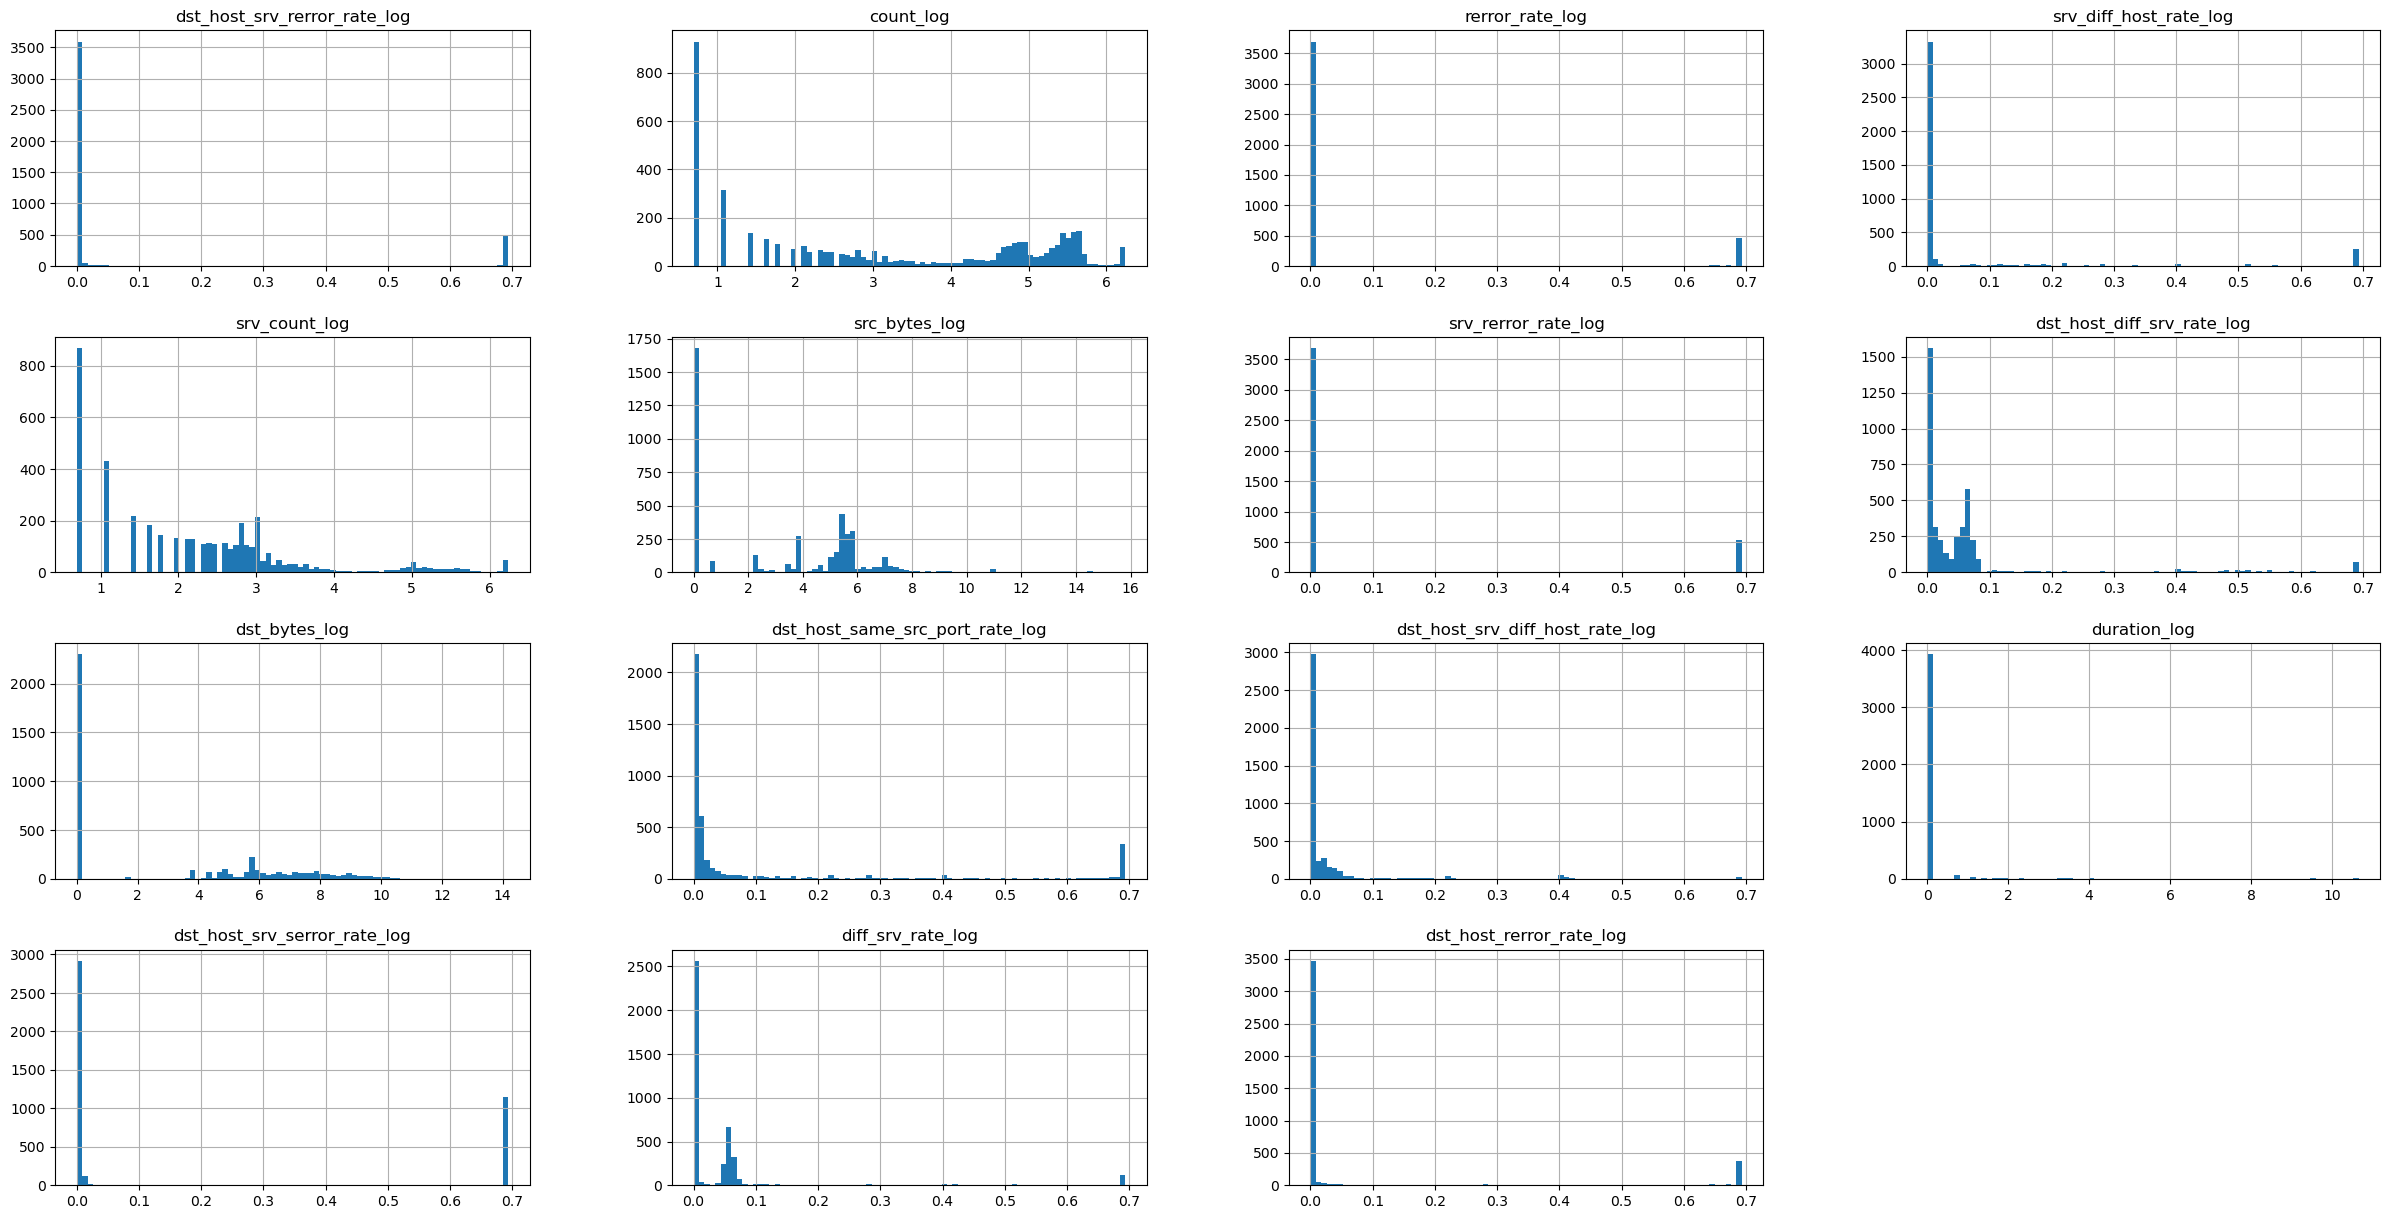

In [30]:
mostly_content[log_cols].hist(bins=80, figsize=(30,15))

In [31]:
mostly_content.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,urgent,num_failed_logins,logged_in,root_shell,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,dst_host_srv_rerror_rate_log,count_log,rerror_rate_log,srv_diff_host_rate_log,srv_count_log,src_bytes_log,srv_rerror_rate_log,dst_host_diff_srv_rate_log,dst_bytes_log,dst_host_same_src_port_rate_log,dst_host_srv_diff_host_rate_log,duration_log,dst_host_srv_serror_rate_log,diff_srv_rate_log,dst_host_rerror_rate_log
0,0,tcp,ftp_data,SF,9311,0,0,0,0,1,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.00,0.0,200,87,0.44,0.01,0.44,0.00,0.00,0.01,0.0,0.0,normal,0.0,2.484907,0.0,0.0,2.484907,9.139059,0.0,0.009950,0.000000,0.364643,0.000000,0.0,0.00995,0.000000,0.00000
1,0,tcp,http,SF,250,5966,0,0,0,1,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.00,0.0,120,255,1.00,0.00,0.01,0.03,0.00,0.00,0.0,0.0,normal,0.0,0.693147,0.0,0.0,0.693147,5.525453,0.0,0.000000,8.694000,0.009950,0.029559,0.0,0.00000,0.000000,0.00000
2,0,tcp,finger,SF,9,593,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.00,0.0,195,8,0.04,0.02,0.01,0.25,0.01,0.00,0.0,0.0,normal,0.0,0.693147,0.0,0.0,0.693147,2.302585,0.0,0.019803,6.386879,0.009950,0.223144,0.0,0.00000,0.000000,0.00000
3,0,udp,private,SF,1,0,0,0,0,0,0,0,0,0,0,0,20,4,0.0,0.0,0.0,0.0,0.2,0.15,0.0,255,4,0.02,0.30,0.90,0.00,0.00,0.00,0.1,0.0,anomaly,0.0,3.044522,0.0,0.0,1.609438,0.693147,0.0,0.262364,0.000000,0.641854,0.000000,0.0,0.00000,0.139762,0.09531
4,0,tcp,http,SF,300,1075,0,0,0,1,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.00,0.0,255,241,0.95,0.01,0.00,0.00,0.00,0.00,0.0,0.0,normal,0.0,1.098612,0.0,0.0,1.098612,5.707110,0.0,0.009950,6.981006,0.000000,0.000000,0.0,0.00000,0.000000,0.00000


In [32]:
mostly_content.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'urgent', 'num_failed_logins', 'logged_in',
       'root_shell', 'num_shells', 'num_access_files', 'num_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'dst_host_srv_rerror_rate_log',
       'count_log', 'rerror_rate_log', 'srv_diff_host_rate_log',
       'srv_count_log', 'src_bytes_log', 'srv_rerror_rate_log',
       'dst_host_diff_srv_rate_log', 'dst_bytes_log',
       'dst_host_same_src_port_rate_log', 'dst_host_srv_diff_host

In [33]:
# drops all columns that were not log transformed 
num_scaled_cols = ['protocol_type', 'service', 'flag','land', 'urgent', 'num_failed_logins', 'logged_in','root_shell', 'num_shells', 'num_access_files', 'num_outbound_cmds','is_host_login', 'is_guest_login', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate','class', 'src_bytes_log', 'dst_host_diff_srv_rate_log', 'srv_rerror_rate_log', 'diff_srv_rate_log', 'srv_count_log', 'dst_host_rerror_rate_log','dst_host_srv_diff_host_rate_log', 'dst_host_srv_rerror_rate_log','count_log', 'dst_host_srv_serror_rate_log', 'srv_diff_host_rate_log', 'dst_bytes_log', 'duration_log', 'dst_host_same_src_port_rate_log', 'rerror_rate_log']

In [34]:
# check that new df doesnt have not-transformed columns (e.g. new df has dst_bytes_log and not dst_bytes etc)

mostly_content_cols = set(mostly_content.columns)
new_df_cols = set(num_scaled_cols)

if mostly_content_cols == new_df_cols:
    print("same columns in both")
else:
    # columns in mostly_content_cols but not new_df_cols
    mostly_content_only = mostly_content_cols - new_df_cols
    print("Columns only in mostly_content:", mostly_content_only)
    # find columns in new_df_cols but not mostly_content_cols
    new_df_only = new_df_cols - mostly_content_cols
    print("\nColumns only in new_df_only:", new_df_only)

Columns only in mostly_content: {'duration', 'srv_rerror_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'dst_host_diff_srv_rate', 'diff_srv_rate', 'count', 'dst_bytes', 'rerror_rate', 'dst_host_rerror_rate', 'srv_diff_host_rate', 'srv_count', 'src_bytes', 'dst_host_srv_diff_host_rate'}

Columns only in new_df_only: set()


#### new df of categorical, binary and scaled below
- dropped mostly 0's
- changed highly skewed
- kept some high kurtosis

In [35]:
num_scaled_df = mostly_content[num_scaled_cols]
num_scaled_df.head()

,protocol_type,service,flag,land,urgent,num_failed_logins,logged_in,root_shell,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,class,src_bytes_log,dst_host_diff_srv_rate_log,srv_rerror_rate_log,diff_srv_rate_log,srv_count_log,dst_host_rerror_rate_log,dst_host_srv_diff_host_rate_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,dst_bytes_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log
0,tcp,ftp_data,SF,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,200,87,0.44,0.00,normal,9.139059,0.009950,0.0,0.000000,2.484907,0.00000,0.000000,0.0,2.484907,0.00995,0.0,0.000000,0.0,0.364643,0.0
1,tcp,http,SF,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,120,255,1.00,0.00,normal,5.525453,0.000000,0.0,0.000000,0.693147,0.00000,0.029559,0.0,0.693147,0.00000,0.0,8.694000,0.0,0.009950,0.0
2,tcp,finger,SF,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,195,8,0.04,0.01,normal,2.302585,0.019803,0.0,0.000000,0.693147,0.00000,0.223144,0.0,0.693147,0.00000,0.0,6.386879,0.0,0.009950,0.0
3,udp,private,SF,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.2,255,4,0.02,0.00,anomaly,0.693147,0.262364,0.0,0.139762,1.609438,0.09531,0.000000,0.0,3.044522,0.00000,0.0,0.000000,0.0,0.641854,0.0
4,tcp,http,SF,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,255,241,0.95,0.00,normal,5.707110,0.009950,0.0,0.000000,1.098612,0.00000,0.000000,0.0,1.098612,0.00000,0.0,6.981006,0.0,0.000000,0.0


## Feature Set 1: log transformation and encoded all categoricals

In [36]:
with_service_flag = num_scaled_df.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

with_service_flag['protocol_type'] = le.fit_transform(with_service_flag['protocol_type'])
with_service_flag['service'] = le.fit_transform(with_service_flag['service'])
with_service_flag['flag'] = le.fit_transform(with_service_flag['flag'])

In [37]:
with_service_flag['class'] = with_service_flag['class'].replace({'anomaly': 1, 'normal': 0})
with_service_flag.head()

,protocol_type,service,flag,land,urgent,num_failed_logins,logged_in,root_shell,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,class,src_bytes_log,dst_host_diff_srv_rate_log,srv_rerror_rate_log,diff_srv_rate_log,srv_count_log,dst_host_rerror_rate_log,dst_host_srv_diff_host_rate_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,dst_bytes_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log
0,1,19,9,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,200,87,0.44,0.00,0,9.139059,0.009950,0.0,0.000000,2.484907,0.00000,0.000000,0.0,2.484907,0.00995,0.0,0.000000,0.0,0.364643,0.0
1,1,22,9,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,120,255,1.00,0.00,0,5.525453,0.000000,0.0,0.000000,0.693147,0.00000,0.029559,0.0,0.693147,0.00000,0.0,8.694000,0.0,0.009950,0.0
2,1,17,9,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,195,8,0.04,0.01,0,2.302585,0.019803,0.0,0.000000,0.693147,0.00000,0.223144,0.0,0.693147,0.00000,0.0,6.386879,0.0,0.009950,0.0
3,2,44,9,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.2,255,4,0.02,0.00,1,0.693147,0.262364,0.0,0.139762,1.609438,0.09531,0.000000,0.0,3.044522,0.00000,0.0,0.000000,0.0,0.641854,0.0
4,1,22,9,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,255,241,0.95,0.00,0,5.707110,0.009950,0.0,0.000000,1.098612,0.00000,0.000000,0.0,1.098612,0.00000,0.0,6.981006,0.0,0.000000,0.0


In [38]:
# with_service_flag.to_csv('data/with_service_flag_training.csv', index=False)

## End of Feature Set 1

## Feature Set 2: indicators instead of service and flag

In [39]:
with_indicators = num_scaled_df.copy()
with_indicators.head()

,protocol_type,service,flag,land,urgent,num_failed_logins,logged_in,root_shell,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,class,src_bytes_log,dst_host_diff_srv_rate_log,srv_rerror_rate_log,diff_srv_rate_log,srv_count_log,dst_host_rerror_rate_log,dst_host_srv_diff_host_rate_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,dst_bytes_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log
0,tcp,ftp_data,SF,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,200,87,0.44,0.00,normal,9.139059,0.009950,0.0,0.000000,2.484907,0.00000,0.000000,0.0,2.484907,0.00995,0.0,0.000000,0.0,0.364643,0.0
1,tcp,http,SF,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,120,255,1.00,0.00,normal,5.525453,0.000000,0.0,0.000000,0.693147,0.00000,0.029559,0.0,0.693147,0.00000,0.0,8.694000,0.0,0.009950,0.0
2,tcp,finger,SF,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,195,8,0.04,0.01,normal,2.302585,0.019803,0.0,0.000000,0.693147,0.00000,0.223144,0.0,0.693147,0.00000,0.0,6.386879,0.0,0.009950,0.0
3,udp,private,SF,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.2,255,4,0.02,0.00,anomaly,0.693147,0.262364,0.0,0.139762,1.609438,0.09531,0.000000,0.0,3.044522,0.00000,0.0,0.000000,0.0,0.641854,0.0
4,tcp,http,SF,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,255,241,0.95,0.00,normal,5.707110,0.009950,0.0,0.000000,1.098612,0.00000,0.000000,0.0,1.098612,0.00000,0.0,6.981006,0.0,0.000000,0.0


In [40]:
with_indicators['isS0'] = np.where(with_indicators['flag'] == 'S0', 1, 0)

with_indicators['isSF'] = np.where(with_indicators['flag'] == 'SF', 1, 0)

with_indicators['isHTTP'] = np.where(with_indicators['service'] == 'http', 1, 0)

with_indicators['isPrivate'] = np.where(with_indicators['service'] == 'private', 1, 0)

In [41]:
old_categoricals = ['flag', 'service']
with_indicators = with_indicators.drop(columns=old_categoricals) 
with_indicators.head()

,protocol_type,land,urgent,num_failed_logins,logged_in,root_shell,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,class,src_bytes_log,dst_host_diff_srv_rate_log,srv_rerror_rate_log,diff_srv_rate_log,srv_count_log,dst_host_rerror_rate_log,dst_host_srv_diff_host_rate_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,dst_bytes_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log,isS0,isSF,isHTTP,isPrivate
0,tcp,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,200,87,0.44,0.00,normal,9.139059,0.009950,0.0,0.000000,2.484907,0.00000,0.000000,0.0,2.484907,0.00995,0.0,0.000000,0.0,0.364643,0.0,0,1,0,0
1,tcp,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,120,255,1.00,0.00,normal,5.525453,0.000000,0.0,0.000000,0.693147,0.00000,0.029559,0.0,0.693147,0.00000,0.0,8.694000,0.0,0.009950,0.0,0,1,1,0
2,tcp,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,195,8,0.04,0.01,normal,2.302585,0.019803,0.0,0.000000,0.693147,0.00000,0.223144,0.0,0.693147,0.00000,0.0,6.386879,0.0,0.009950,0.0,0,1,0,0
3,udp,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.2,255,4,0.02,0.00,anomaly,0.693147,0.262364,0.0,0.139762,1.609438,0.09531,0.000000,0.0,3.044522,0.00000,0.0,0.000000,0.0,0.641854,0.0,0,1,0,1
4,tcp,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,255,241,0.95,0.00,normal,5.707110,0.009950,0.0,0.000000,1.098612,0.00000,0.000000,0.0,1.098612,0.00000,0.0,6.981006,0.0,0.000000,0.0,0,1,1,0


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

with_indicators['protocol_type'] = le.fit_transform(with_indicators['protocol_type'])

In [43]:
with_indicators['class'] = with_indicators['class'].replace({'anomaly': 1, 'normal': 0})

In [44]:
with_indicators.head()

,protocol_type,land,urgent,num_failed_logins,logged_in,root_shell,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,class,src_bytes_log,dst_host_diff_srv_rate_log,srv_rerror_rate_log,diff_srv_rate_log,srv_count_log,dst_host_rerror_rate_log,dst_host_srv_diff_host_rate_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,dst_bytes_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log,isS0,isSF,isHTTP,isPrivate
0,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,200,87,0.44,0.00,0,9.139059,0.009950,0.0,0.000000,2.484907,0.00000,0.000000,0.0,2.484907,0.00995,0.0,0.000000,0.0,0.364643,0.0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,120,255,1.00,0.00,0,5.525453,0.000000,0.0,0.000000,0.693147,0.00000,0.029559,0.0,0.693147,0.00000,0.0,8.694000,0.0,0.009950,0.0,0,1,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,195,8,0.04,0.01,0,2.302585,0.019803,0.0,0.000000,0.693147,0.00000,0.223144,0.0,0.693147,0.00000,0.0,6.386879,0.0,0.009950,0.0,0,1,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.2,255,4,0.02,0.00,1,0.693147,0.262364,0.0,0.139762,1.609438,0.09531,0.000000,0.0,3.044522,0.00000,0.0,0.000000,0.0,0.641854,0.0,0,1,0,1
4,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,255,241,0.95,0.00,0,5.707110,0.009950,0.0,0.000000,1.098612,0.00000,0.000000,0.0,1.098612,0.00000,0.0,6.981006,0.0,0.000000,0.0,0,1,1,0


In [45]:
# with_indicators.to_csv('data/with_indicators_training.csv', index=False)

## End of experiment 2

## Feature Set 3: Small Feature Set 

In [46]:
less_features = num_scaled_df.copy()

In [47]:
# create new features based on what we learned in categorical exploration

less_features['isS0'] = np.where(less_features['flag'] == 'S0', 1, 0)

less_features['isSF'] = np.where(less_features['flag'] == 'SF', 1, 0)

less_features['isHTTP'] = np.where(less_features['service'] == 'http', 1, 0)

less_features['isPrivate'] = np.where(less_features['service'] == 'private', 1, 0)

In [48]:
less_features = less_features.drop(columns=['flag', 'service']) 
less_features.head()

,protocol_type,land,urgent,num_failed_logins,logged_in,root_shell,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,class,src_bytes_log,dst_host_diff_srv_rate_log,srv_rerror_rate_log,diff_srv_rate_log,srv_count_log,dst_host_rerror_rate_log,dst_host_srv_diff_host_rate_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,dst_bytes_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log,isS0,isSF,isHTTP,isPrivate
0,tcp,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,200,87,0.44,0.00,normal,9.139059,0.009950,0.0,0.000000,2.484907,0.00000,0.000000,0.0,2.484907,0.00995,0.0,0.000000,0.0,0.364643,0.0,0,1,0,0
1,tcp,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,120,255,1.00,0.00,normal,5.525453,0.000000,0.0,0.000000,0.693147,0.00000,0.029559,0.0,0.693147,0.00000,0.0,8.694000,0.0,0.009950,0.0,0,1,1,0
2,tcp,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,195,8,0.04,0.01,normal,2.302585,0.019803,0.0,0.000000,0.693147,0.00000,0.223144,0.0,0.693147,0.00000,0.0,6.386879,0.0,0.009950,0.0,0,1,0,0
3,udp,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.2,255,4,0.02,0.00,anomaly,0.693147,0.262364,0.0,0.139762,1.609438,0.09531,0.000000,0.0,3.044522,0.00000,0.0,0.000000,0.0,0.641854,0.0,0,1,0,1
4,tcp,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,255,241,0.95,0.00,normal,5.707110,0.009950,0.0,0.000000,1.098612,0.00000,0.000000,0.0,1.098612,0.00000,0.0,6.981006,0.0,0.000000,0.0,0,1,1,0


In [49]:
less_features['class2'] = less_features['class'].replace({'anomaly': 1, 'normal': 0})

In [50]:
less_features['protocol_type'] = le.fit_transform(less_features['protocol_type'])
    
less_features.head()

,protocol_type,land,urgent,num_failed_logins,logged_in,root_shell,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,class,src_bytes_log,dst_host_diff_srv_rate_log,srv_rerror_rate_log,diff_srv_rate_log,srv_count_log,dst_host_rerror_rate_log,dst_host_srv_diff_host_rate_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,dst_bytes_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log,isS0,isSF,isHTTP,isPrivate,class2
0,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,200,87,0.44,0.00,normal,9.139059,0.009950,0.0,0.000000,2.484907,0.00000,0.000000,0.0,2.484907,0.00995,0.0,0.000000,0.0,0.364643,0.0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,120,255,1.00,0.00,normal,5.525453,0.000000,0.0,0.000000,0.693147,0.00000,0.029559,0.0,0.693147,0.00000,0.0,8.694000,0.0,0.009950,0.0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,195,8,0.04,0.01,normal,2.302585,0.019803,0.0,0.000000,0.693147,0.00000,0.223144,0.0,0.693147,0.00000,0.0,6.386879,0.0,0.009950,0.0,0,1,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.2,255,4,0.02,0.00,anomaly,0.693147,0.262364,0.0,0.139762,1.609438,0.09531,0.000000,0.0,3.044522,0.00000,0.0,0.000000,0.0,0.641854,0.0,0,1,0,1,1
4,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,255,241,0.95,0.00,normal,5.707110,0.009950,0.0,0.000000,1.098612,0.00000,0.000000,0.0,1.098612,0.00000,0.0,6.981006,0.0,0.000000,0.0,0,1,1,0,0


In [51]:
less_features = less_features.drop(columns=['class'])
less_features.head()

,protocol_type,land,urgent,num_failed_logins,logged_in,root_shell,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,src_bytes_log,dst_host_diff_srv_rate_log,srv_rerror_rate_log,diff_srv_rate_log,srv_count_log,dst_host_rerror_rate_log,dst_host_srv_diff_host_rate_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,dst_bytes_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log,isS0,isSF,isHTTP,isPrivate,class2
0,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,200,87,0.44,0.00,9.139059,0.009950,0.0,0.000000,2.484907,0.00000,0.000000,0.0,2.484907,0.00995,0.0,0.000000,0.0,0.364643,0.0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,120,255,1.00,0.00,5.525453,0.000000,0.0,0.000000,0.693147,0.00000,0.029559,0.0,0.693147,0.00000,0.0,8.694000,0.0,0.009950,0.0,0,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,195,8,0.04,0.01,2.302585,0.019803,0.0,0.000000,0.693147,0.00000,0.223144,0.0,0.693147,0.00000,0.0,6.386879,0.0,0.009950,0.0,0,1,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.2,255,4,0.02,0.00,0.693147,0.262364,0.0,0.139762,1.609438,0.09531,0.000000,0.0,3.044522,0.00000,0.0,0.000000,0.0,0.641854,0.0,0,1,0,1,1
4,1,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,255,241,0.95,0.00,5.707110,0.009950,0.0,0.000000,1.098612,0.00000,0.000000,0.0,1.098612,0.00000,0.0,6.981006,0.0,0.000000,0.0,0,1,1,0,0


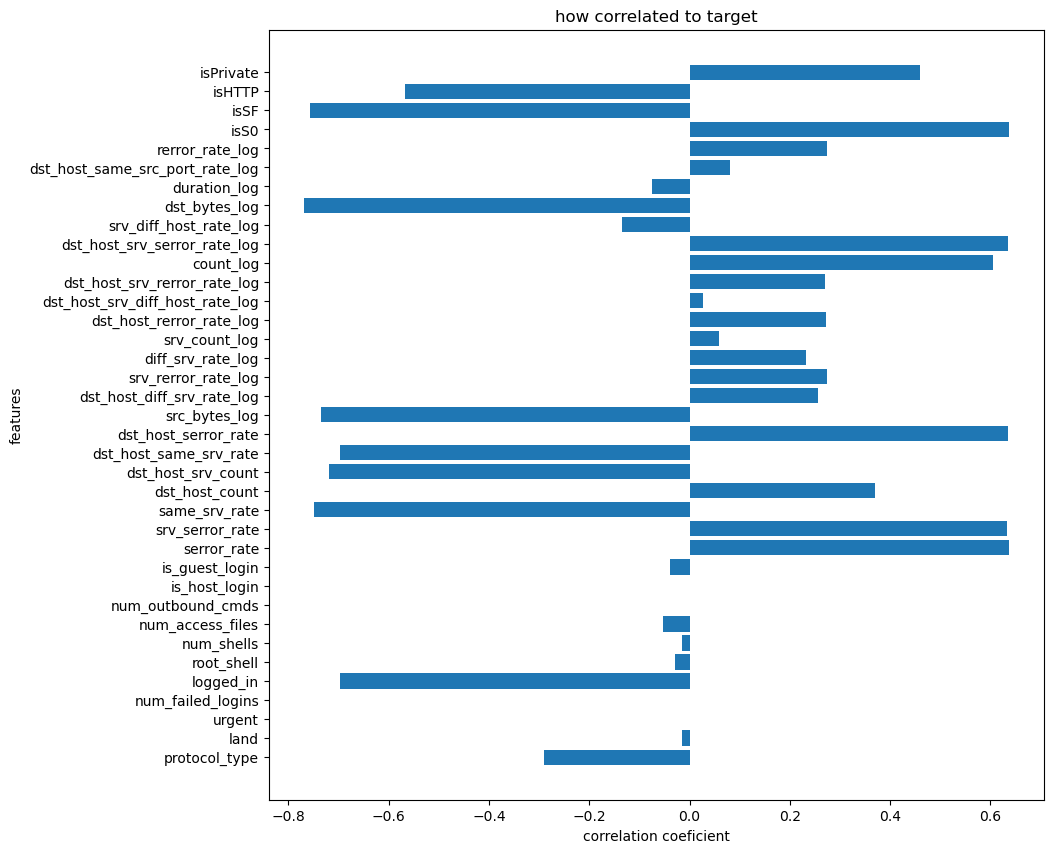

In [52]:
# getcorrelation coefficients
corr = less_features.corr()['class2'][:-1] # exclude class

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(less_features.columns[:-1], corr) # change between corr abs and corr
ax.set_xlabel('correlation coeficient')
ax.set_ylabel('features')
ax.set_title('how correlated to target')
plt.show()

In [53]:
# get all the features with no correlation to class
nan_cols = []
for feature in corr.index:
    if feature == 'class2':
        continue
    if pd.isna(corr[feature]):
        nan_cols.append(feature)

nan_cols

['urgent', 'num_failed_logins', 'num_outbound_cmds', 'is_host_login']

In [54]:
less_features = less_features.drop(columns=nan_cols) 
less_features.head()

,protocol_type,land,logged_in,root_shell,num_shells,num_access_files,is_guest_login,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,src_bytes_log,dst_host_diff_srv_rate_log,srv_rerror_rate_log,diff_srv_rate_log,srv_count_log,dst_host_rerror_rate_log,dst_host_srv_diff_host_rate_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,dst_bytes_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log,isS0,isSF,isHTTP,isPrivate,class2
0,1,0,1,0,0,0,0,0.0,0.0,1.0,200,87,0.44,0.00,9.139059,0.009950,0.0,0.000000,2.484907,0.00000,0.000000,0.0,2.484907,0.00995,0.0,0.000000,0.0,0.364643,0.0,0,1,0,0,0
1,1,0,1,0,0,0,0,0.0,0.0,1.0,120,255,1.00,0.00,5.525453,0.000000,0.0,0.000000,0.693147,0.00000,0.029559,0.0,0.693147,0.00000,0.0,8.694000,0.0,0.009950,0.0,0,1,1,0,0
2,1,0,0,0,0,0,0,0.0,0.0,1.0,195,8,0.04,0.01,2.302585,0.019803,0.0,0.000000,0.693147,0.00000,0.223144,0.0,0.693147,0.00000,0.0,6.386879,0.0,0.009950,0.0,0,1,0,0,0
3,2,0,0,0,0,0,0,0.0,0.0,0.2,255,4,0.02,0.00,0.693147,0.262364,0.0,0.139762,1.609438,0.09531,0.000000,0.0,3.044522,0.00000,0.0,0.000000,0.0,0.641854,0.0,0,1,0,1,1
4,1,0,1,0,0,0,0,0.0,0.0,1.0,255,241,0.95,0.00,5.707110,0.009950,0.0,0.000000,1.098612,0.00000,0.000000,0.0,1.098612,0.00000,0.0,6.981006,0.0,0.000000,0.0,0,1,1,0,0


In [55]:
variances = less_features.var()

# change
threshold = 0.01

low_variance_features = variances[variances < threshold].index.tolist()
low_variance_features

['land',
 'root_shell',
 'num_shells',
 'num_access_files',
 'is_guest_login',
 'dst_host_srv_diff_host_rate_log']

In [56]:
less_features.drop(low_variance_features, axis=1, inplace=True)
less_features.columns

Index(['protocol_type', 'logged_in', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate', 'src_bytes_log',
       'dst_host_diff_srv_rate_log', 'srv_rerror_rate_log',
       'diff_srv_rate_log', 'srv_count_log', 'dst_host_rerror_rate_log',
       'dst_host_srv_rerror_rate_log', 'count_log',
       'dst_host_srv_serror_rate_log', 'srv_diff_host_rate_log',
       'dst_bytes_log', 'duration_log', 'dst_host_same_src_port_rate_log',
       'rerror_rate_log', 'isS0', 'isSF', 'isHTTP', 'isPrivate', 'class2'],
      dtype='object')

In [57]:
less_features['class'] = less_features['class2']
less_features.drop(['class2'], axis=1, inplace=True)
less_features.columns

Index(['protocol_type', 'logged_in', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate', 'src_bytes_log',
       'dst_host_diff_srv_rate_log', 'srv_rerror_rate_log',
       'diff_srv_rate_log', 'srv_count_log', 'dst_host_rerror_rate_log',
       'dst_host_srv_rerror_rate_log', 'count_log',
       'dst_host_srv_serror_rate_log', 'srv_diff_host_rate_log',
       'dst_bytes_log', 'duration_log', 'dst_host_same_src_port_rate_log',
       'rerror_rate_log', 'isS0', 'isSF', 'isHTTP', 'isPrivate', 'class'],
      dtype='object')

In [58]:
#less_features.to_csv('data/less_features_training.csv', index=False)

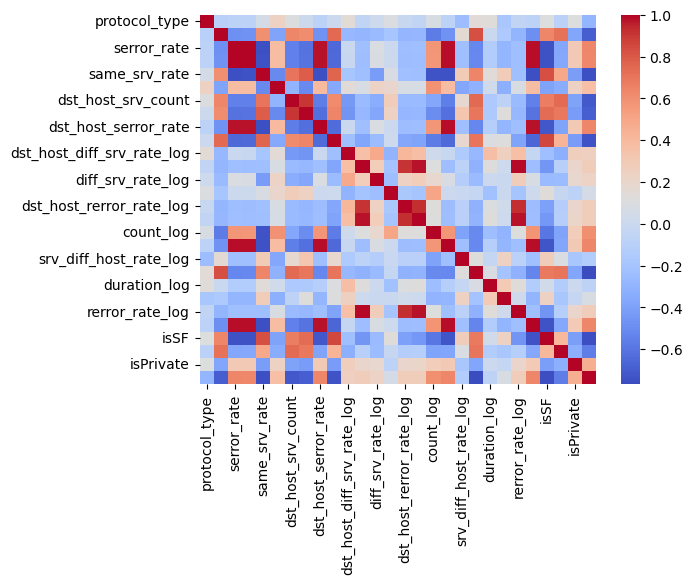

In [59]:
sns.heatmap(less_features.corr(), annot=False, cmap='coolwarm')
plt.show()

In [60]:
less_features.corr().abs()

,protocol_type,logged_in,serror_rate,srv_serror_rate,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,src_bytes_log,dst_host_diff_srv_rate_log,srv_rerror_rate_log,diff_srv_rate_log,srv_count_log,dst_host_rerror_rate_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,dst_bytes_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log,isS0,isSF,isHTTP,isPrivate,class
protocol_type,1.000000,0.105328,0.078980,0.082578,0.050536,0.234487,0.103640,0.008185,0.083046,0.004272,0.151838,0.051430,0.013477,0.097327,0.016936,0.051730,0.079648,0.082210,0.245845,0.148860,0.132008,0.177338,0.050954,0.080941,0.109634,0.089508,0.115161,0.290373
logged_in,0.105328,1.000000,0.478956,0.475433,0.601768,0.383709,0.635328,0.606409,0.473926,0.749027,0.274758,0.286227,0.258014,0.188718,0.285375,0.282347,0.570064,0.473809,0.162027,0.832695,0.008603,0.167353,0.292515,0.488089,0.634718,0.710120,0.376356,0.697680
serror_rate,0.078980,0.478956,1.000000,0.994349,0.750591,0.383077,0.552896,0.610582,0.976903,0.652572,0.004115,0.234794,0.092773,0.002567,0.238309,0.233210,0.576572,0.979425,0.234867,0.524416,0.138715,0.286879,0.232470,0.982224,0.745244,0.368859,0.308087,0.636049
srv_serror_rate,0.082578,0.475433,0.994349,1.000000,0.742412,0.379564,0.547784,0.604383,0.974044,0.649586,0.018880,0.241068,0.082239,0.005269,0.243830,0.239041,0.569498,0.983163,0.232115,0.518070,0.138311,0.286906,0.234897,0.984107,0.743402,0.365287,0.302974,0.632079
same_srv_rate,0.050536,0.601768,0.750591,0.742412,1.000000,0.508829,0.705578,0.786108,0.747923,0.764537,0.191597,0.230618,0.429519,0.086247,0.226672,0.232322,0.736899,0.747616,0.291390,0.646396,0.138796,0.287230,0.231995,0.749764,0.829400,0.495068,0.416817,0.749341
dst_host_count,0.234487,0.383709,0.383077,0.379564,0.508829,1.000000,0.302963,0.510018,0.398966,0.355679,0.147205,0.079940,0.231159,0.198863,0.075642,0.070162,0.589935,0.391099,0.369560,0.311021,0.031062,0.326744,0.078173,0.381386,0.393635,0.346972,0.246355,0.369314
dst_host_srv_count,0.103640,0.635328,0.552896,0.547784,0.705578,0.302963,1.000000,0.906090,0.564687,0.613499,0.439550,0.257694,0.338450,0.271443,0.262506,0.262623,0.372176,0.560882,0.182677,0.745968,0.166085,0.071002,0.261949,0.548400,0.672505,0.742467,0.394095,0.718901
dst_host_same_srv_rate,0.008185,0.606409,0.610582,0.604383,0.786108,0.510018,0.906090,1.000000,0.624752,0.642281,0.463182,0.272768,0.373603,0.233904,0.280755,0.276163,0.493153,0.618016,0.324956,0.698041,0.160436,0.123555,0.277669,0.604832,0.735308,0.689394,0.425325,0.696293
dst_host_serror_rate,0.083046,0.473926,0.976903,0.974044,0.747923,0.398966,0.564687,0.624752,1.000000,0.643484,0.006763,0.233787,0.088737,0.000683,0.246635,0.236664,0.573582,0.984095,0.233158,0.521795,0.118584,0.290613,0.231186,0.973573,0.725984,0.384156,0.304216,0.635578
src_bytes_log,0.004272,0.749027,0.652572,0.649586,0.764537,0.355679,0.613499,0.642281,0.643484,1.000000,0.233436,0.379651,0.252011,0.017220,0.368245,0.382864,0.573130,0.645927,0.189063,0.707752,0.095610,0.120735,0.387577,0.658974,0.857187,0.430964,0.429027,0.734770


In [61]:
multico_features = ['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'srv_rerror_rate_log', 'dst_host_rerror_rate_log', 'dst_bytes_log']

less_features.drop(multico_features, axis=1, inplace=True)

less_features.columns

Index(['protocol_type', 'logged_in', 'same_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate', 'src_bytes_log',
       'dst_host_diff_srv_rate_log', 'diff_srv_rate_log', 'srv_count_log',
       'dst_host_srv_rerror_rate_log', 'count_log',
       'dst_host_srv_serror_rate_log', 'srv_diff_host_rate_log',
       'duration_log', 'dst_host_same_src_port_rate_log', 'rerror_rate_log',
       'isS0', 'isSF', 'isHTTP', 'isPrivate', 'class'],
      dtype='object')

In [62]:
less_features.head()

,protocol_type,logged_in,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,src_bytes_log,dst_host_diff_srv_rate_log,diff_srv_rate_log,srv_count_log,dst_host_srv_rerror_rate_log,count_log,dst_host_srv_serror_rate_log,srv_diff_host_rate_log,duration_log,dst_host_same_src_port_rate_log,rerror_rate_log,isS0,isSF,isHTTP,isPrivate,class
0,1,1,1.0,200,87,0.44,9.139059,0.009950,0.000000,2.484907,0.0,2.484907,0.00995,0.0,0.0,0.364643,0.0,0,1,0,0,0
1,1,1,1.0,120,255,1.00,5.525453,0.000000,0.000000,0.693147,0.0,0.693147,0.00000,0.0,0.0,0.009950,0.0,0,1,1,0,0
2,1,0,1.0,195,8,0.04,2.302585,0.019803,0.000000,0.693147,0.0,0.693147,0.00000,0.0,0.0,0.009950,0.0,0,1,0,0,0
3,2,0,0.2,255,4,0.02,0.693147,0.262364,0.139762,1.609438,0.0,3.044522,0.00000,0.0,0.0,0.641854,0.0,0,1,0,1,1
4,1,1,1.0,255,241,0.95,5.707110,0.009950,0.000000,1.098612,0.0,1.098612,0.00000,0.0,0.0,0.000000,0.0,0,1,1,0,0


In [63]:
less_features.to_csv('data/less_features_training_2.csv', index=False)

## End of Feature Set 3

#### Strong negative correlation with the target variable 
- variables have inverse relationship
- when independent variable values INCREASE, dependent (target) variable values DECREASE
- "useful predictor in models that aim to predict or explain the target variable"

#### Strong positive correlation with the target variable
- feature and target increase / decrease together
- = direct relationship between them